In [1]:
from skimage.transform import resize
import tensorflow as tf
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
model = tf.keras.models.load_model(r'C:\Users\omen\Documents\Website Template\Models\Classify.h5')

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1536)              6144      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 11184436 (42.67 MB)
Trainable params: 1109

In [4]:
image_size = (224, 224)

In [5]:
from keras.preprocessing import image
image_path = r"C:\Users\omen\Documents\PythonCodes\Sem_5\ML_Codes\Assignments\Datasets\Retinopathy\Base\train\Moderate\0da09e3ce8f1.png"
img = image.load_img(image_path, target_size=image_size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# img_array /= 255.0 

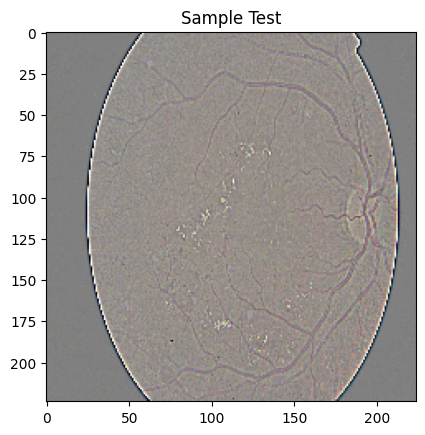

In [6]:
plt.imshow(img)
plt.title('Sample Test')
plt.show()

In [7]:
prediction = model.predict(img_array)

predicted_class = np.argmax(prediction)
if predicted_class==0:
    print("Mild")
elif predicted_class==1:
    print("Moderate")
elif predicted_class==2:
    print("No DR detected")
elif predicted_class==3:
    print("Proliferated")
else:
    print("Severe")

1/1 [==============================] - 2s 2s/step
Moderate


In [10]:
from keras.preprocessing.image import ImageDataGenerator

test_dir = r"C:\Users\omen\Documents\PythonCodes\Sem_5\ML_Codes\Assignments\Datasets\Retinopathy\SampleDirectory\test"

test_batches = ImageDataGenerator().flow_from_directory(test_dir, target_size=image_size, shuffle=False)

Found 145 images belonging to 5 classes.


In [13]:
loss, acc = model.evaluate_generator(test_batches, verbose=1)
print("Accuracy: ", acc)

C:\Users\omen\AppData\Local\Temp\ipykernel_28504\2709150825.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, acc = model.evaluate_generator(test_batches, verbose=1)


5/5 [==============================] - 5s 1s/step - loss: 0.4465 - accuracy: 0.9448
Accuracy:  0.9448275566101074


5/5 [==============================] - 6s 909ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.88      1.00      0.94        29
           2       1.00      1.00      1.00        29
           3       0.93      0.90      0.91        29
           4       0.92      0.83      0.87        29

    accuracy                           0.94       145
   macro avg       0.95      0.94      0.94       145
weighted avg       0.95      0.94      0.94       145



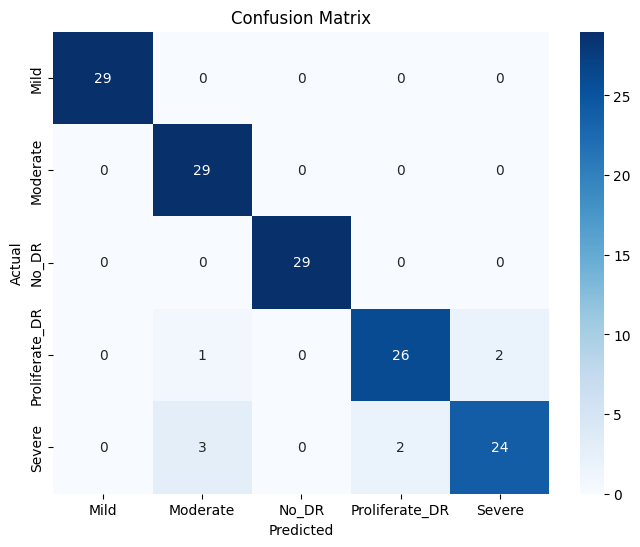

In [11]:
predictions = model.predict(test_batches)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_batches.classes

cm = confusion_matrix(true_labels, predicted_labels)

# Print classification report
print("Classification Report:\n", classification_report(true_labels, predicted_labels))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe'], yticklabels=['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()